In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
df = pd.read_csv('stress_data.csv')
df.head()

,age,sleep_duration,heart_rate,work_hours,screen_time,physical_activity,stress_level
0,56,5.3,72.0,9.3,4.9,5.0,2
1,46,6.6,68.0,11.3,5.0,62.0,0
2,32,7.5,85.0,8.8,5.3,58.0,0
3,25,6.3,80.0,12.6,6.5,33.0,1
4,38,8.2,108.0,13.3,6.8,17.0,2


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                8000 non-null   int64  
 1   sleep_duration     8000 non-null   float64
 2   heart_rate         8000 non-null   float64
 3   work_hours         8000 non-null   float64
 4   screen_time        8000 non-null   float64
 5   physical_activity  8000 non-null   float64
 6   stress_level       8000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 437.6 KB


In [5]:
df.isnull().sum()

age                  0
sleep_duration       0
heart_rate           0
work_hours           0
screen_time          0
physical_activity    0
stress_level         0
dtype: int64

In [6]:
df['stress_level'].value_counts()

stress_level
2    2667
0    2667
1    2666
Name: count, dtype: int64

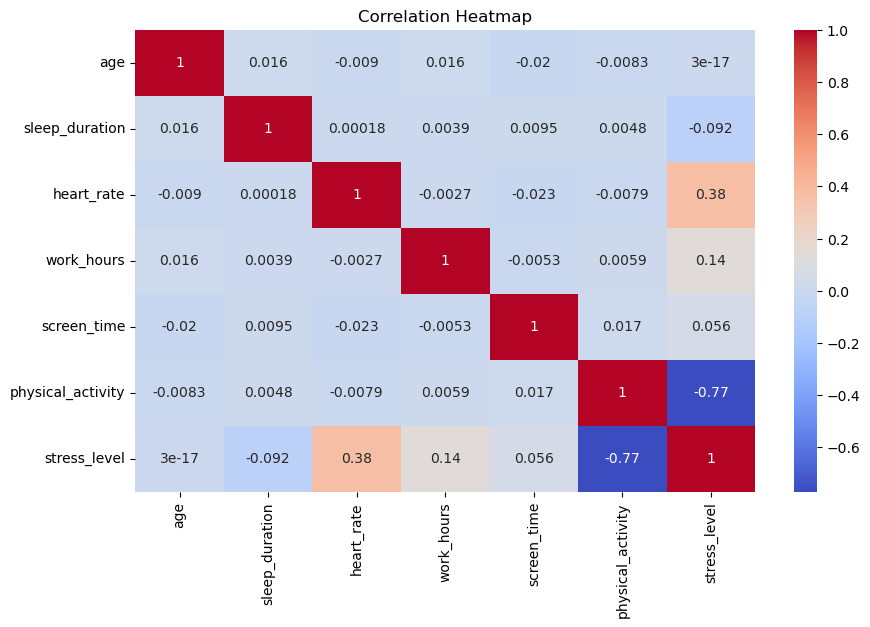

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

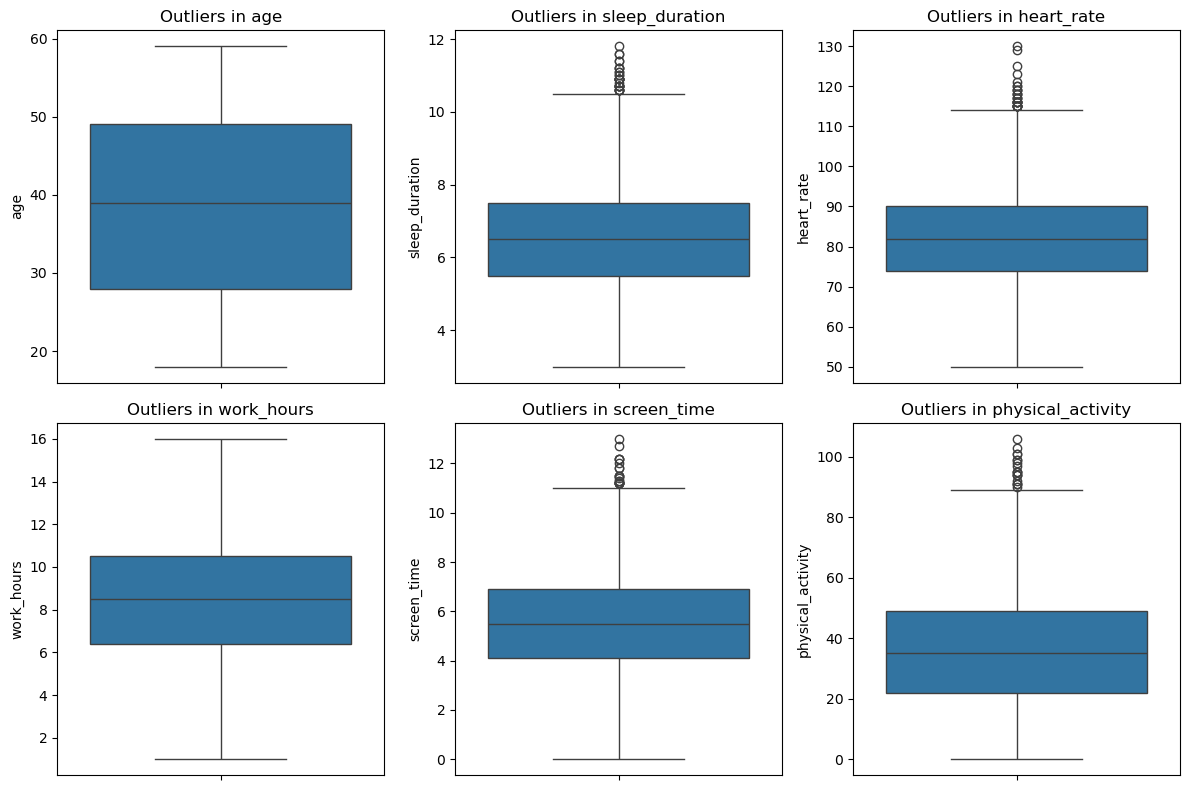

In [8]:
numeric_cols = ['age', 'sleep_duration', 'heart_rate', 'work_hours', 'screen_time', 'physical_activity']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

In [9]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

# Remove outliers column-wise
for col in numeric_cols:
    before = df.shape[0]
    df = remove_outliers(df, col)
    after = df.shape[0]
    print(f"{col} → Removed {before - after} outliers")

age → Removed 0 outliers
sleep_duration → Removed 31 outliers
heart_rate → Removed 29 outliers
work_hours → Removed 0 outliers
screen_time → Removed 20 outliers
physical_activity → Removed 18 outliers


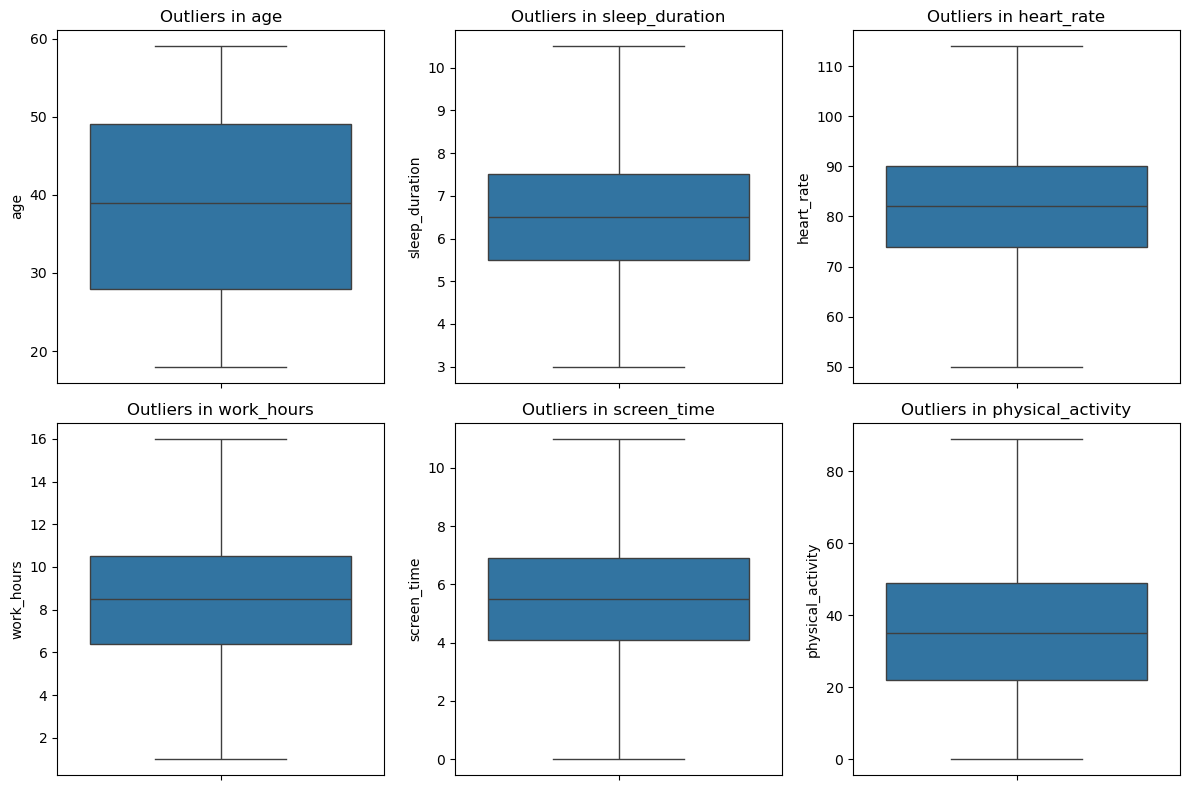

In [10]:


plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

In [11]:
df.shape

(7902, 7)

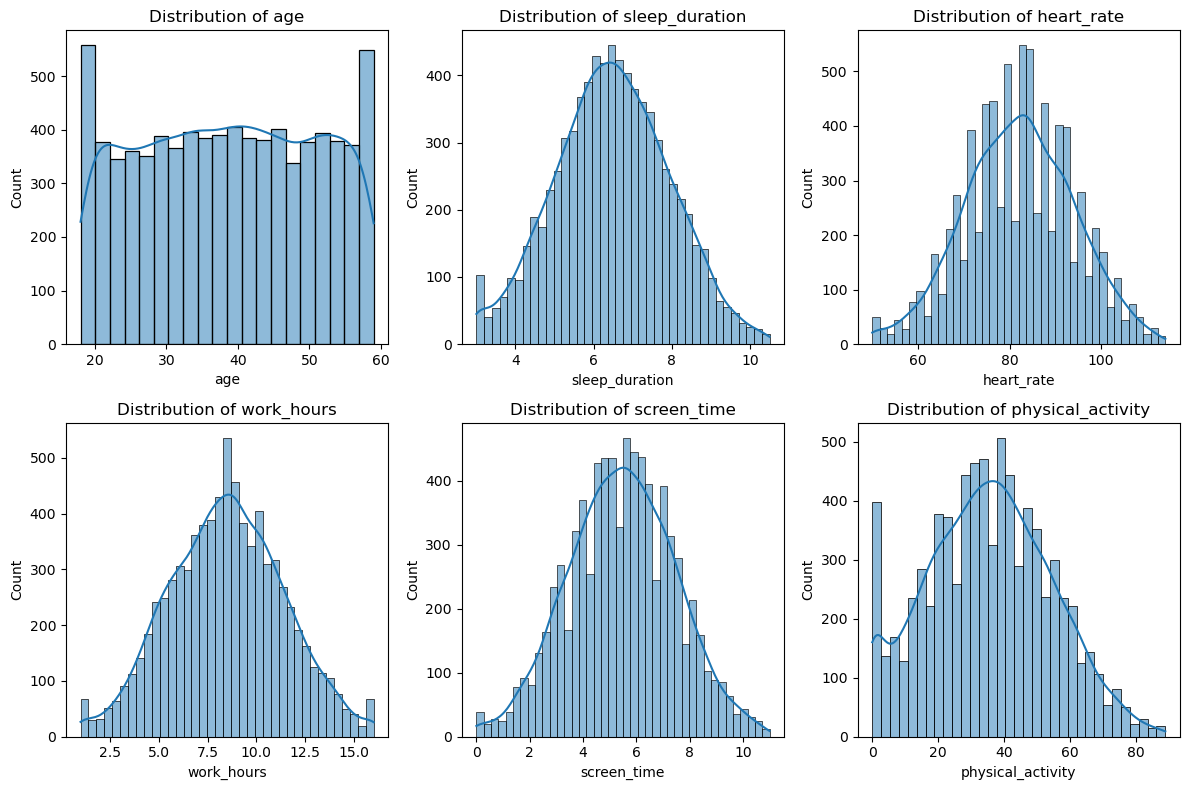

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [13]:
X=df.drop('stress_level', axis=1)
y=df['stress_level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [16]:
model = RandomForestClassifier(n_estimators=100,
    max_depth=15,
    random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_test

4983    0
4970    1
2332    0
7044    1
3579    2
       ..
4171    2
1429    1
4355    2
3183    0
903     0
Name: stress_level, Length: 1581, dtype: int64

In [19]:
y_pred

array([0, 1, 0, ..., 2, 0, 0], dtype=int64)

In [20]:
accuracy_score(y_test, y_pred)

0.8412397216951296

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       519
           1       0.75      0.78      0.76       520
           2       0.89      0.88      0.88       542

    accuracy                           0.84      1581
   macro avg       0.84      0.84      0.84      1581
weighted avg       0.84      0.84      0.84      1581



0 → Low Stress
1 → Medium Stress
2 → High Stress


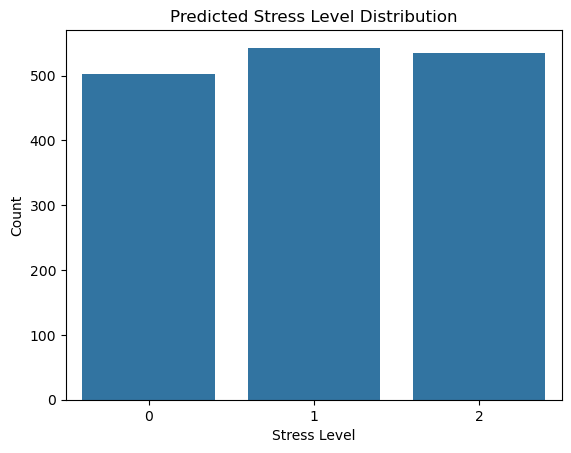

In [22]:
sns.countplot(x=y_pred)
plt.title("Predicted Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

In [23]:
joblib.dump(model, "stress_model.pkl")
joblib.dump(Scaler, "scaler.pkl")

['scaler.pkl']

In [24]:
def predict_stress(age, sleep, hr, work, screen, activity):
    data = np.array([[age, sleep, hr, work, screen, activity]])
    scaled = Scaler.transform(data)
    pred = model.predict(scaled)[0]
    stress_map = {0: "Low", 1: "Medium", 2: "High"}
    return stress_map[pred]


In [25]:
print("Test:", predict_stress(22,4,110,12,9,0))

Test: High


c:\Users\RAUNAK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
